In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
x=np.array([1.,2.,3.,4.,5.])
y=np.array([1.,3.,2.,3.,5.])

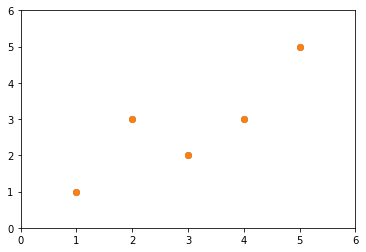

In [5]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [11]:
x_mean=np.mean(x)
y_mean=np.mean(y)
print(x_mean)
print(y_mean)

3.0
2.8


In [7]:
num=0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num+= (x_i - x_mean)*(y_i - y_mean)
    d += (x_i - x_mean) **2

In [9]:
a=num/d
b= y_mean - a*x_mean

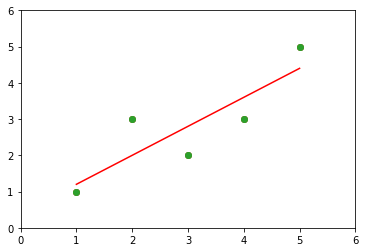

In [13]:
y_pre=a*x+b

#  绘制原来的点
plt.scatter(x,y)
# 绘制 y预测的预测曲线
plt.plot(x,y_pre,color='r')
plt.axis([0,6,0,6])
plt.show()

In [14]:
x_pre_1=6 
y_pre_1=a*x_pre_1 + b

y_pre_1

5.2000000000000002

#### 向量化运算

In [13]:
num=(x - x_mean).dot(y - y_mean)
d=(x - x_mean).dot(x - x_mean)

a=num/d
b= y_mean - a*x_mean

In [14]:
print(a) 
print(b)

0.8
0.4


In [15]:
x_pre_1=6 
y_pre=a*x_pre_1+b
y_pre

5.2000000000000002

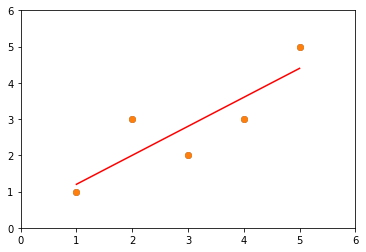

In [18]:
y_pre=a*x+b
#  绘制原来的点
plt.scatter(x,y)
# 绘制 y预测的预测曲线
plt.plot(x,y_pre,color='r')
plt.axis([0,6,0,6])
plt.show()

#### 向量化实现的性能测试

In [20]:
max_size=100000
big_x=np.random.random(size=max_size)
big_y=big_x*2.0+np.random.normal(size=max_size)

In [25]:
def reg1(x_train,y_train):
    x_mean=np.mean(x_train)
    y_mean=np.mean(y_train)
    num=(x_train - x_mean).dot(y_train - y_mean)
    d=(x_train - x_mean).dot(x_train - x_mean)
    a=num/d
    b= y_mean - a*x_mean
    return a,b


def reg2(x_train,y_train):
    x_mean=np.mean(x_train)
    y_mean=np.mean(y_train)
    num=0.0
    d = 0.0
    for x_i,y_i in zip(x_train,y_train):
        num+= (x_i - x_mean)*(y_i - y_mean)
        d += (x_i - x_mean) **2
    a=num/d
    b= y_mean - a*x_mean
    return a,b


In [26]:
%timeit a1,b1=reg1(big_x,big_y)
%timeit a2,b2=reg2(big_x,big_y)

423 µs ± 67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
103 ms ± 3.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
a1,b1=reg1(big_x,big_y)
a2,b2=reg2(big_x,big_y)
print(a1)
print(a2)
print(b1)
print(b2)

2.01644566304
2.01644566304
-0.010968200937
-0.010968200937


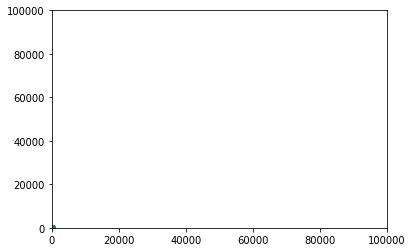

In [28]:
big_pre_x=np.random.random(size=max_size)
big_pre_y=a1*big_pre_x+b1


In [34]:
big_pre_y

array([ 1.3515036 ,  1.00738399,  0.62451642, ...,  1.53839319,
        0.76406619,  0.62545652])

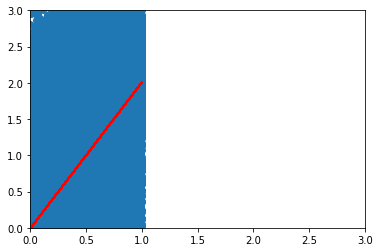

In [39]:
#  绘制原来的点
plt.scatter(big_x,big_y)
# 绘制 y预测的预测曲线
plt.plot(big_pre_x,big_pre_y,color='r')
plt.axis([0,3,0,3])
plt.show()